## **Machine Learning Final Project**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Thursday (05/06/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [ ]:
#ITP 449 Final Project, Wee Jin Koh

#Medium Article: https://weejinko.medium.com/itp-449-final-project-machine-learning-models-844ceb85ab9c
#Github repository: https://github.com/wjsgtw/ITP-449-FinalProject

In [ ]:
# Start solution here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.dummy import DummyClassifier

# Data Reading, Cleaning, and Exploration

In [ ]:
#two-class classifier prediction model

#Data reading

#Dataset source: https://www.kaggle.com/radmirzosimov/telecom-users-dataset 
df = pd.read_csv('telecom_users.csv')


Overview of Variables (from https://www.kaggle.com/radmirzosimov/telecom-users-dataset)

- customerID - customer id
- gender - client gender (male / female)
- SeniorCitizen - is the client retired (1, 0)
- Partner - is the client married (Yes, No)
- tenure - how many months a person has been a client of the company
- PhoneService - is the telephone service connected (Yes, No)
- MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
- InternetService - client's Internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - is the online security service connected (Yes, No, No internet service)
- OnlineBackup - is the online backup service activated (Yes, No, No internet service)
- DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
- TechSupport - is the technical support service connected (Yes, No, No internet service)
- StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
- StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
- Contract - type of customer contract (Month-to-month, One year, Two year)
- PaperlessBilling - whether the client uses paperless billing (Yes, No)
- PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - current monthly payment
- TotalCharges - the total amount that the client paid for the services for the entire time
- Churn - whether there was a churn (Yes or No)



In [ ]:
#initial exploration
print(df.shape) #shape of dataset is 5986 instances with 22 attributes
print(df.head())
print(df.info())
print(df.columns.values)
print(df.isnull().sum())

#The dependent variable should be churn, because a combination all of the other attributes determine if the customer will leave the telco or not.
#There are no null values upon first inspection.



(5986, 22)
   Unnamed: 0  customerID  gender  ...  MonthlyCharges TotalCharges Churn
0        1869  7010-BRBUU    Male  ...           24.10      1734.65    No
1        4528  9688-YGXVR  Female  ...           88.15       3973.2    No
2        6344  9286-DOJGF  Female  ...           74.95      2869.85   Yes
3        6739  6994-KERXL    Male  ...           55.90        238.5    No
4         432  2181-UAESM    Male  ...           53.45        119.5    No

[5 rows x 22 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   

In [ ]:
#data cleansing

#original index and customerID are not relevant to predicting Churn result; these columns are dropped
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [ ]:
#data preparation

#TotalCharges has Dtype object. Tried changing to float, but got error message about empty spaces.
#Figuring out which items in TotalCharges cannot be changed to a float due to empty spaces, replace with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.replace(" ", ""), errors='coerce')

print(df.info()) #confirmed TotalCharges now is Dtype float
print(df.isnull().sum()) #ten TotalCharges items identified as NaN

#replace NaN values with average Total Charges amount
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

#double check to make sure that there are no more null values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


No     4399
Yes    1587
Name: Churn, dtype: int64


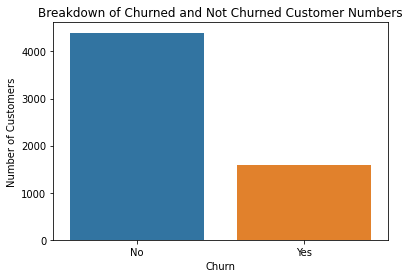

In [ ]:
#1) breakdown of the numbers of Yes and No for churn

print(df['Churn'].value_counts())

sns.countplot(x='Churn', data=df)
plt.title("Breakdown of Churned and Not Churned Customer Numbers")
plt.ylabel("Number of Customers")
plt.show()

#It appears that our dataset does not have an approximately equal number of target variable results.

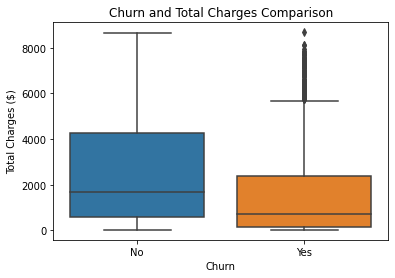

In [ ]:
#2) Hypothesis that the total amounts charged are correlated with Churn rate
boxplot = sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Churn and Total Charges Comparison")
plt.ylabel("Total Charges ($)")
plt.show()
#While there are a lot of outliers (aka those who paid exorbitant amounts are rightly leaving), total charges for churn overall are lower, perhaps signifying shorter tenure?

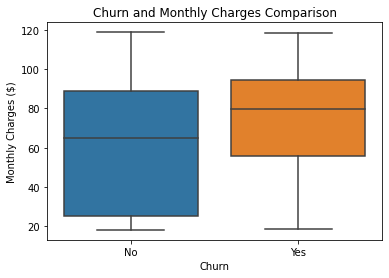

In [ ]:
#2 continued) Hypothesis that the monthly amounts charged are correlated with Churn rate
boxplot = sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Churn and Monthly Charges Comparison")
plt.ylabel("Monthly Charges ($)")
plt.show()
#It appears that those churned are those with higher monthly payments and lower total charges probably as a result of not staying very long with the telco.

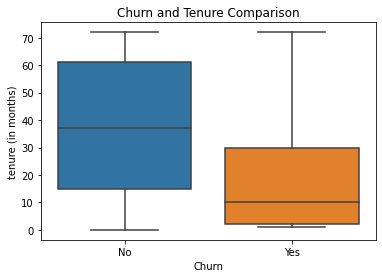

In [ ]:
#3) From the results in #2, is there a pattern with tenure and churn rate?
boxplot = sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Churn and Tenure Comparison")
plt.ylabel("tenure (in months)")
plt.show()

#As previously inferred, those who are churned left the telco after a shorter period of service.

In [ ]:
'''With some initial hypothesis answered, let's see how much does each feature variable affect churn in a series of ML models to predict churn.'''

"With some initial hypothesis answered, let's see how much does each feature variable affect churn in a series of ML models to predict churn."

In [ ]:
#data preparation continued

#create dummy variables for the categorical attributes other than the target variable
df2 = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 
                                  'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])

#moving Churn to the first column to make iloc easier
cols = list(df2.columns)
a, b = cols.index('SeniorCitizen'), cols.index('Churn')
cols[b], cols[a] = cols[a], cols[b]
df2 = df2[cols]
df2.head()


,Churn,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,No,72,24.10,1734.65,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
1,No,44,88.15,3973.20,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0
2,Yes,38,74.95,2869.85,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
3,No,4,55.90,238.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0
4,No,2,53.45,119.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0


# Modeling

## Partition of train and test sets

In [ ]:
#Split the data into a training and test set.

X = df2.iloc[:,1:]
y = df2.iloc[:,0]


#due to "ConvergenceWarning: lbfgs failed to converge (status=1)" warning message on models,
#it appears models are not converging due to poor scaling of decision variables

#use .fit_transform on feature variables to calculate (fit) standardized mean and variance and apply it to all
#applying to columns only to retain DataFrame type rather than turning X into ndarray
features = X.columns
scaler = StandardScaler()
X[features] = scaler.fit_transform(X[features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2021)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4190, 45)
(4190,)
(1796, 45)
(1796,)


In [ ]:
#establishing baseline accuracy
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)

print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.7544543429844098


## Basic Models

In [ ]:
#Logistic Regression model

model_lr = LogisticRegression(random_state=2021)
model_lr.fit(X_train, y_train)

pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, pred_lr)

#cross validation done using Stratified K-Fold with 10 folds
CVS_lr = np.mean(cross_val_score(model_lr, X, y, cv=10))
print('Cross Validation Score = ',CVS_lr)
print('Accuracy = ', accuracy_lr)


Cross Validation Score =  0.8028718432616234
Accuracy =  0.8184855233853007


In [ ]:
#cross validation to find best hyperparameters

model_lr = LogisticRegression(random_state=2021)

#define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2021)

#define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

#define search
search = RandomizedSearchCV(model_lr, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=2021)

#execute search
result = search.fit(X, y)
#summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


#This cell took 15 minutes to execute!

Best Score: 0.8023708224223577
Best Hyperparameters: {'C': 2.9759315515996994, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
#Logistic Regression fine-tuned model

model_lr_tuned = LogisticRegression(random_state=2021, C=2.9759315515996994, penalty='l2', solver='liblinear')
model_lr_tuned.fit(X_train, y_train)

pred_lr_tuned = model_lr_tuned.predict(X_test)
accuracy_lr_tuned = accuracy_score(y_test, pred_lr_tuned)

#cross validation done using Stratified K-Fold with 10 folds
CVS_lr_tuned = np.mean(cross_val_score(model_lr_tuned, X, y, cv=10))
print('Cross Validation Score = ',CVS_lr_tuned)
print('Accuracy = ', accuracy_lr_tuned)

Cross Validation Score =  0.8022037844568148
Accuracy =  0.8184855233853007


In [ ]:
'''NOTE: Due to the minimal differences between cross validation score and 
accuracy score for all models I tried, I have elected not do perform hyperparameter fine tuning 
for any other model like I did for logistic regression. 
RandomSearchCV, already time efficient compared to other parameter estimation methods like GridSearchCV, 
still took 15 minutes to execute on Colab for logistic regression. 
In the interest of time and with the hardware limitation of Colab plus the minimal differences in the scores, 
I decided that fine tuning was not worth the insubstantial improvements yielded for my models.

Spoken with TAs Amulya and Meghana about this.'''

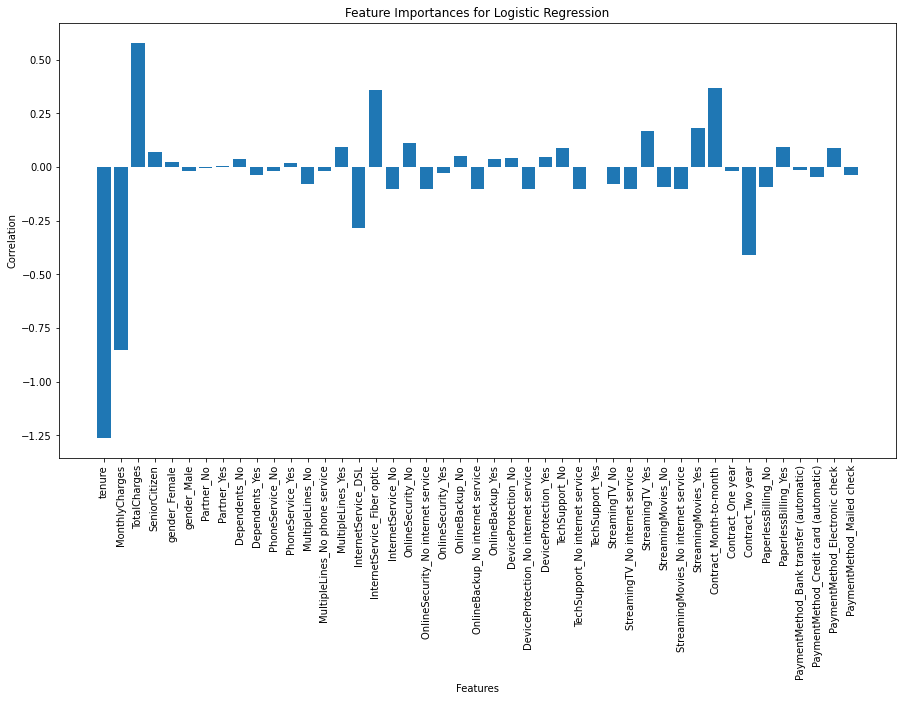

In [ ]:
#graph of all Logistic Regression feature importances

f = plt.figure() 
f.set_figwidth(15) 
f.set_figheight(8) 
importance = model_lr_tuned.coef_[0]
plt.bar([X.columns[x] for x in range(len(X.columns))], importance)
plt.xticks(rotation = 90)
plt.title('Feature Importances for Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

In [ ]:
#top 3 important features for Logistic Regression

#take absolute value of .coef_ to be able to sort correctly
coefs=abs(model_lr_tuned.coef_[0])

top_three = np.argsort(coefs)[-3:]
top_three_sorted = top_three[::-1]

lr_feat_impt = X.columns[top_three_sorted]
lr_feat_impt = lr_feat_impt.tolist()

lr_feat_impt_df = pd.DataFrame(lr_feat_impt,columns=['Top Features'])
lr_feat_impt_df.index += 1
print(lr_feat_impt_df)

     Top Features
1          tenure
2  MonthlyCharges
3    TotalCharges


In [ ]:
#Decision Tree model
model_dt = DecisionTreeClassifier(random_state=2021)
model_dt.fit(X_train, y_train)

pred_dt = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, pred_dt)

CVS_dt = np.mean(cross_val_score(model_dt, X, y, cv=10))
print('Cross Validation Score = ',CVS_dt)
print('Accuracy = ', accuracy_dt)

Cross Validation Score =  0.7310358401125623
Accuracy =  0.7232739420935412


## Averaging Ensemble Models

In [ ]:
#Generic Bagging model

base_est = DecisionTreeClassifier()
model_bagging = BaggingClassifier(base_estimator=base_est,n_estimators= 10,random_state = 2021)
model_bagging.fit(X_train, y_train)

pred_bagging = model_bagging.predict(X_test)
accuracy_bagging = accuracy_score(y_test, pred_bagging)

CVS_bagging = np.mean(cross_val_score(model_bagging, X, y, cv=10))
print('Cross Validation Score = ',CVS_bagging)
print('Accuracy = ', accuracy_bagging)

Cross Validation Score =  0.7738024913317066
Accuracy =  0.7928730512249443


In [ ]:
#Random Forest model

model_rf = RandomForestClassifier(n_estimators=100, max_features=7, random_state= 2021)
model_rf.fit(X_train, y_train)

predict_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predict_rf)

CVS_rf = np.mean(cross_val_score(model_rf, X, y, cv=10))
print('Cross Validation Score = ',CVS_rf)
print('Accuracy = ', accuracy_rf)

Cross Validation Score =  0.7895078754445815
Accuracy =  0.7884187082405345


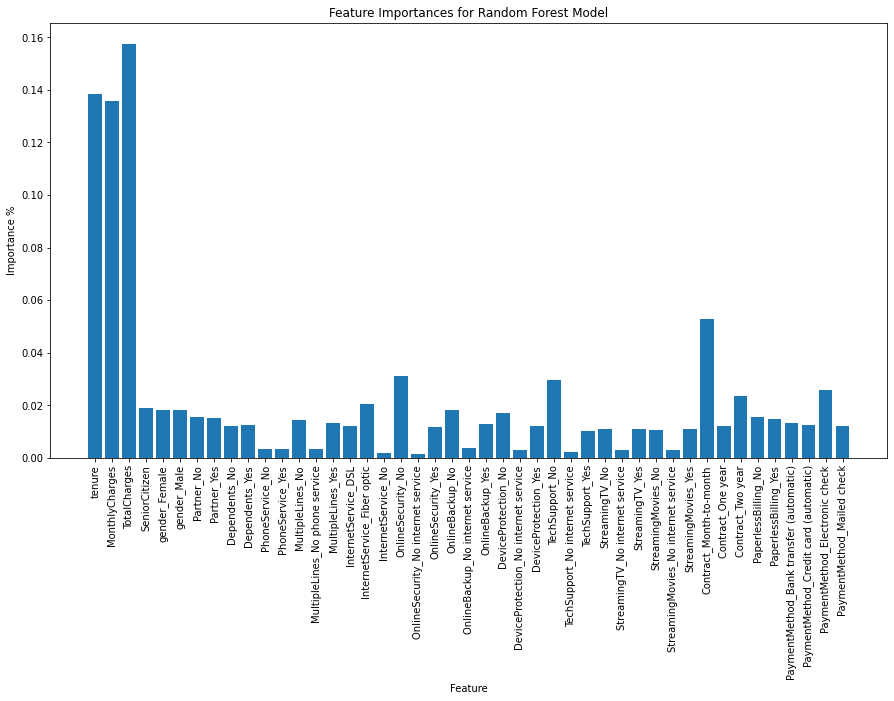

In [ ]:
#graph of all Random Forest feature importances
f = plt.figure() 
f.set_figwidth(15) 
f.set_figheight(8) 

plt.bar([X_train.columns[x] for x in range(len(X_train.columns))], model_rf.feature_importances_)
plt.xticks(rotation = 90)
plt.title('Feature Importances for Random Forest Model')
plt.xlabel('Feature')
plt.ylabel('Importance %')
plt.show()

In [ ]:
# Top 3 features for RandomForest
feature_importances = model_rf.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances}).nlargest(3, 'importance')
print(df)

         features  importance
2    TotalCharges    0.157585
0          tenure    0.138539
1  MonthlyCharges    0.135793


## Support Vector Machine Model

In [ ]:
#SVM using C-Support Vector

model_SVM = svm.SVC(probability = True,random_state=2021)

model_SVM.fit(X_train, y_train)

predict_SVM = model_SVM.predict(X_test)
accuracy_SVM = accuracy_score(y_test, predict_SVM)

CVS_SVM = np.mean(cross_val_score(model_SVM, X, y, cv=10))
print('Cross Validation Score = ',CVS_SVM)
print('Accuracy = ', accuracy_SVM)

Cross Validation Score =  0.7996979358015868
Accuracy =  0.8173719376391982


## Boosting Ensemble Models



In [ ]:
#AdaBoost
base_est2 = DecisionTreeClassifier(max_depth= 10)
ada_boost = AdaBoostClassifier(base_est2, n_estimators=200, random_state=2021, learning_rate=.05)
ada_boost.fit(X_train, y_train)

predict_ada = ada_boost.predict(X_test)
accuracy_ada_boost = accuracy_score(y_test, predict_ada)

CVS_ada = np.mean(cross_val_score(ada_boost, X, y, cv=10))
print('Cross Validation Score = ',CVS_ada)
print('Accuracy = ', accuracy_ada_boost)

Cross Validation Score =  0.78232198591856
Accuracy =  0.7744988864142539


In [ ]:
#xgboost

model_xgb = xgb.XGBClassifier(learning_rate=0.01,verbosity=0, colsample_bytree = 0.3,
                max_depth = 5, alpha = 10, n_estimators = 10, random_state=2021)

model_xgb.fit(X_train, y_train)

predict_xgb = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, predict_xgb)

CVS_xgb = np.mean(cross_val_score(model_xgb, X, y, cv=10))
print('Cross Validation Score = ',CVS_xgb)
print('Accuracy = ', accuracy_xgb)

Cross Validation Score =  0.783161735557032
Accuracy =  0.8101336302895323


##Voting Ensemble

In [ ]:
#Voting Ensemble for Classification
#taking the 4 most high performing models from above

estimator = [('lr', model_lr_tuned), ('svm', model_SVM), ('rf', model_rf), ('xgb', model_xgb)]

eclf = VotingClassifier(estimators=estimator, voting='soft')
eclf.fit(X_train, y_train)

voting_pred = eclf.predict(X_test)
accuracy_voting = accuracy_score(y_test, voting_pred)

CVS_voting = np.mean(cross_val_score(eclf, X, y, cv=10,))
print('Cross Validation Score = ',CVS_voting)
print("Accuracy = ", accuracy_voting)

Cross Validation Score =  0.8023698918487334
Accuracy =  0.8240534521158129
